In [1]:
! pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.0 MB/s eta 0:00:00


In [2]:
# Import Google Drive and OS libraries
from google.colab import drive
import os

# Import data manipulation libraries
import pandas as pd
import numpy as np
import math

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical and data processing functions
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler

# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Import search and evaluation tools
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Check if drive is already mounted
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

# Configure plotting and display settings
%matplotlib inline
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Basic statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data Handling

In [6]:
# Aggregate Features
# Create new aggregated features for square footage, garage, bathrooms, age, and porches
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'] + df['TotalBsmtSF']
df['TotalPorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['GarageCapacity'] = df['GarageArea'] / df['GarageCars']
df['TotalBsmtSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF']
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']

# Fill missing values for LotFrontage using the median LotFrontage of each Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill missing values for Masonry Veneer type and area
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

# Fill missing values for Garage-related columns
df['GarageCapacity'].fillna(0, inplace=True)  # Assuming no garage if missing
df['GarageAge'].fillna(0, inplace=True)       # Assuming no garage if missing
df['GarageOverall'] = df[['GarageQual', 'GarageCond']].apply(lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else 'NA', axis=1)
df.drop(columns=['GarageType'], inplace=True)

# Fill missing values for Basement-related columns
df['BsmtOverall'] = df[['BsmtQual', 'BsmtCond']].apply(lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else 'NA', axis=1)

# Combine Condition1 and Condition2 into a single ConditionScore, filling missing values
df['ConditionScore'] = df[['Condition1', 'Condition2']].apply(lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else 'NA', axis=1)

# Combine Exterior1st and Exterior2nd into ExteriorOverall, filling missing values
df['ExteriorOverall'] = df[['Exterior1st', 'Exterior2nd']].apply(lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else 'NA', axis=1)
df.drop(columns=['Exterior1st', 'Exterior2nd'], inplace=True)

# Convert PavedDrive to binary
df['PavedDriveBinary'] = df['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
df.drop(columns=['PavedDrive'], inplace=True)

# Fill missing values for Heating and HeatingQC and combine into HeatingQuality
df['HeatingQuality'] = df[['Heating', 'HeatingQC']].apply(lambda x: x.dropna().mode().iloc[0] if not x.dropna().empty else 'NA', axis=1)
df.drop(columns=['Heating'], inplace=True)

# Create PoolScore using PoolQC and PoolArea, filling missing PoolQC with 'NA'
df['PoolScore'] = df['PoolArea'] * df['PoolQC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'NA': 0}).fillna(0)
df.drop(columns=['PoolArea', 'PoolQC'], inplace=True)

# Convert MiscVal to a binary feature indicating the presence of miscellaneous features
df['MiscFeatureBinary'] = df['MiscVal'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['MiscVal'], inplace=True)

# Bin OverallQual and OverallCond into Low, Medium, and High, and assign numeric values instead of categories
for col in ['OverallQual', 'OverallCond']:
    if col in df.columns:
      df[col + '_Binned'] = pd.cut(df[col], bins=[0, 4, 6, 10], labels=[1, 2, 3]).astype(int)
      df.drop(columns=[col], inplace=True)

# Combine Basement finish types into a single score for TotalBsmtFinType, filling missing values as 0
df['TotalBsmtFinType'] = (
    df['BsmtFinType1'].replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': 0}) +
    df['BsmtFinType2'].replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': 0})
)
df['TotalBsmtFinType'].fillna(0, inplace=True)

# Dropping columns used to create aggregate features and other specified columns
columns_to_drop_after_merge = [
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'GarageArea', 'GarageCars', 'GarageYrBlt',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'FullBath', 'HalfBath', 'YearBuilt',
    'YearRemodAdd', 'Functional', 'MoSold', 'YrSold', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2',
    'Id', 'Street', 'Fence', 'FireplaceQu', 'GarageFinish', 'RoofStyle', 'ExterQual',
    'BsmtFullBath', 'BsmtHalfBath', 'Electrical', 'Heating', 'HeatingQC', 'Alley', 'MiscFeature'
]

df = df.drop(columns=[col for col in columns_to_drop_after_merge if col in df.columns])

In [7]:
# Define rank mappings, covering all specified columns
rank_mappings = {
    'MSSubClass': {160: 1, 120: 2, 180: 3, 60: 4, 20: 5, 50: 6, 75: 7, 85: 8, 90: 9, 70: 10, 40: 11, 30: 12,
                   45: 13, 150: 14, 190: 15, 80: 16},
    'MSZoning': {'FV': 1, 'RL': 2, 'RP': 3, 'RM': 4, 'RH': 5, 'C': 6, 'A': 7, 'I': 8},
    'LotConfig': {'CulDSac': 1, 'Corner': 2, 'FR2': 3, 'Inside': 4},
    'LotShape': {  # Rank mapping for LotShape
        'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4
    },
    'LandContour': {  # Rank mapping for LandContour
        'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4
    },
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'BldgType': {'1Fam': 1, 'TwnhsE': 2, 'TwnhsI': 3, 'Duplx': 4, '2FmCon': 5},
    'HouseStyle': {'2.5Fin': 1, '2Story': 2, '1Story': 3, '1.5Fin': 4, 'SLvl': 5, 'SFoyer': 6, '1.5Unf': 7, '2.5Unf': 8},
    'MasVnrType': {'Stone': 1, 'BrkFace': 2, 'BrkCmn': 3, 'CBlock': 4, 'None': 5},
    'ExterQual': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    'ExterCond': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    'BsmtExposure': {'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4, 'NA': 5},
    'HeatingQC': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    'KitchenQual': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    'GarageFinish': {'Fin': 1, 'RFn': 2, 'Unf': 3, 'NA': 4},
    'Neighborhood': {
        'NoRidge': 1, 'NridgHt': 2, 'StoneBr': 3, 'Somerst': 4, 'Timber': 5, 'Veenker': 6, 'CollgCr': 7,
        'NWAmes': 8, 'Blmngtn': 9, 'Names': 10, 'ClearCr': 11, 'SWISU': 12, 'OldTown': 13, 'Edwards': 14,
        'BrkSide': 15, 'Mitchel': 16, 'SawyerW': 17, 'Sawyer': 18, 'BrDale': 19, 'MeadowV': 20, 'IDOTRR': 21
    },
    'SaleType': {
        'New': 1, 'WD': 2, 'CWD': 3, 'VWD': 4, 'Con': 5, 'ConLD': 6, 'ConLI': 7, 'ConLw': 8, 'COD': 9, 'Oth': 10
    },
    'SaleCondition': {
        'Normal': 1, 'Partial': 2, 'Alloca': 3, 'AdjLand': 4, 'Family': 5, 'Abnorml': 6
    },
    'Functional': {
        'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8, 'Ex': 1
    },
    'Utilities': {
        'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4
    },
    'Condition1': {  # Rank mapping for Condition1 and Condition2 (same mapping for both)
        'Norm': 1, 'PosA': 2, 'PosN': 3, 'RRNe': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'Feedr': 8, 'Artery': 9
    },
    'Condition2': {  # Same mapping for Condition2
        'Norm': 1, 'PosA': 2, 'PosN': 3, 'RRNe': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'Feedr': 8, 'Artery': 9
    },
    'GarageQual': {  # Quality ranking for GarageQual and GarageCond
        'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6
    },
    'GarageCond': {  # Same ranking for GarageCond
        'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6
    },
    'RoofMatl': {  # Ranking for RoofMatl
        'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5, 'Tar&Grv': 6, 'WdShake': 7, 'WdShngl': 8
    },
    'Foundation': {  # Ranking for Foundation
        'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6
    },
    'CentralAir': {  # Binary encoding for CentralAir
        'Y': 1, 'N': 0
    }
}

# Apply rank mappings to the respective columns in df
for col, mapping in rank_mappings.items():
    if col in df.columns:
        # Fill missing values with the mode before applying the mapping to ensure no missing values remain
        df[col].fillna(df[col].mode()[0], inplace=True)
        # Apply mapping
        df[col] = df[col].map(mapping)


from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# List of ordinal columns with predefined ranks (apply LabelEncoder)
ordinal_columns = ['GarageOverall', 'BsmtOverall', 'ConditionScore', 'ExteriorOverall', 'HeatingQuality']
for col in ordinal_columns:
    df[col] = le.fit_transform(df[col])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1450 non-null   float64
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   LotShape            1460 non-null   int64  
 5   LandContour         1460 non-null   int64  
 6   Utilities           1460 non-null   int64  
 7   LotConfig           1456 non-null   float64
 8   LandSlope           1460 non-null   int64  
 9   Neighborhood        1094 non-null   float64
 10  BldgType            1334 non-null   float64
 11  HouseStyle          1460 non-null   int64  
 12  RoofMatl            1460 non-null   int64  
 13  MasVnrType          1460 non-null   int64  
 14  MasVnrArea          1460 non-null   float64
 15  ExterCond           1460 non-null   int64  
 16  Founda

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace common placeholders with NaN
df = df.replace(["", "NA", "N/A", "null", " ", -1], np.nan)

# Separate columns by data type
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check for and drop empty columns in categorical columns
empty_cols = df[categorical_columns].columns[df[categorical_columns].isnull().all()]
df = df.drop(columns=empty_cols)
categorical_columns = df.select_dtypes(include=['object']).columns  # Update after dropping

# Convert categorical columns to string type to ensure consistency
df[categorical_columns] = df[categorical_columns].astype(str)

# Impute missing values
# Numerical imputation
num_imputer = SimpleImputer(strategy='mean')  # or 'median'
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Categorical imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_columns:
    try:
        df[col] = cat_imputer.fit_transform(df[[col]])
    except ValueError as e:
        print(f"Error imputing column {col}: {e}")

# Verify no missing values remain
print("Total missing values after imputation:", df.isnull().sum().sum())

Total missing values after imputation: 0


EDA

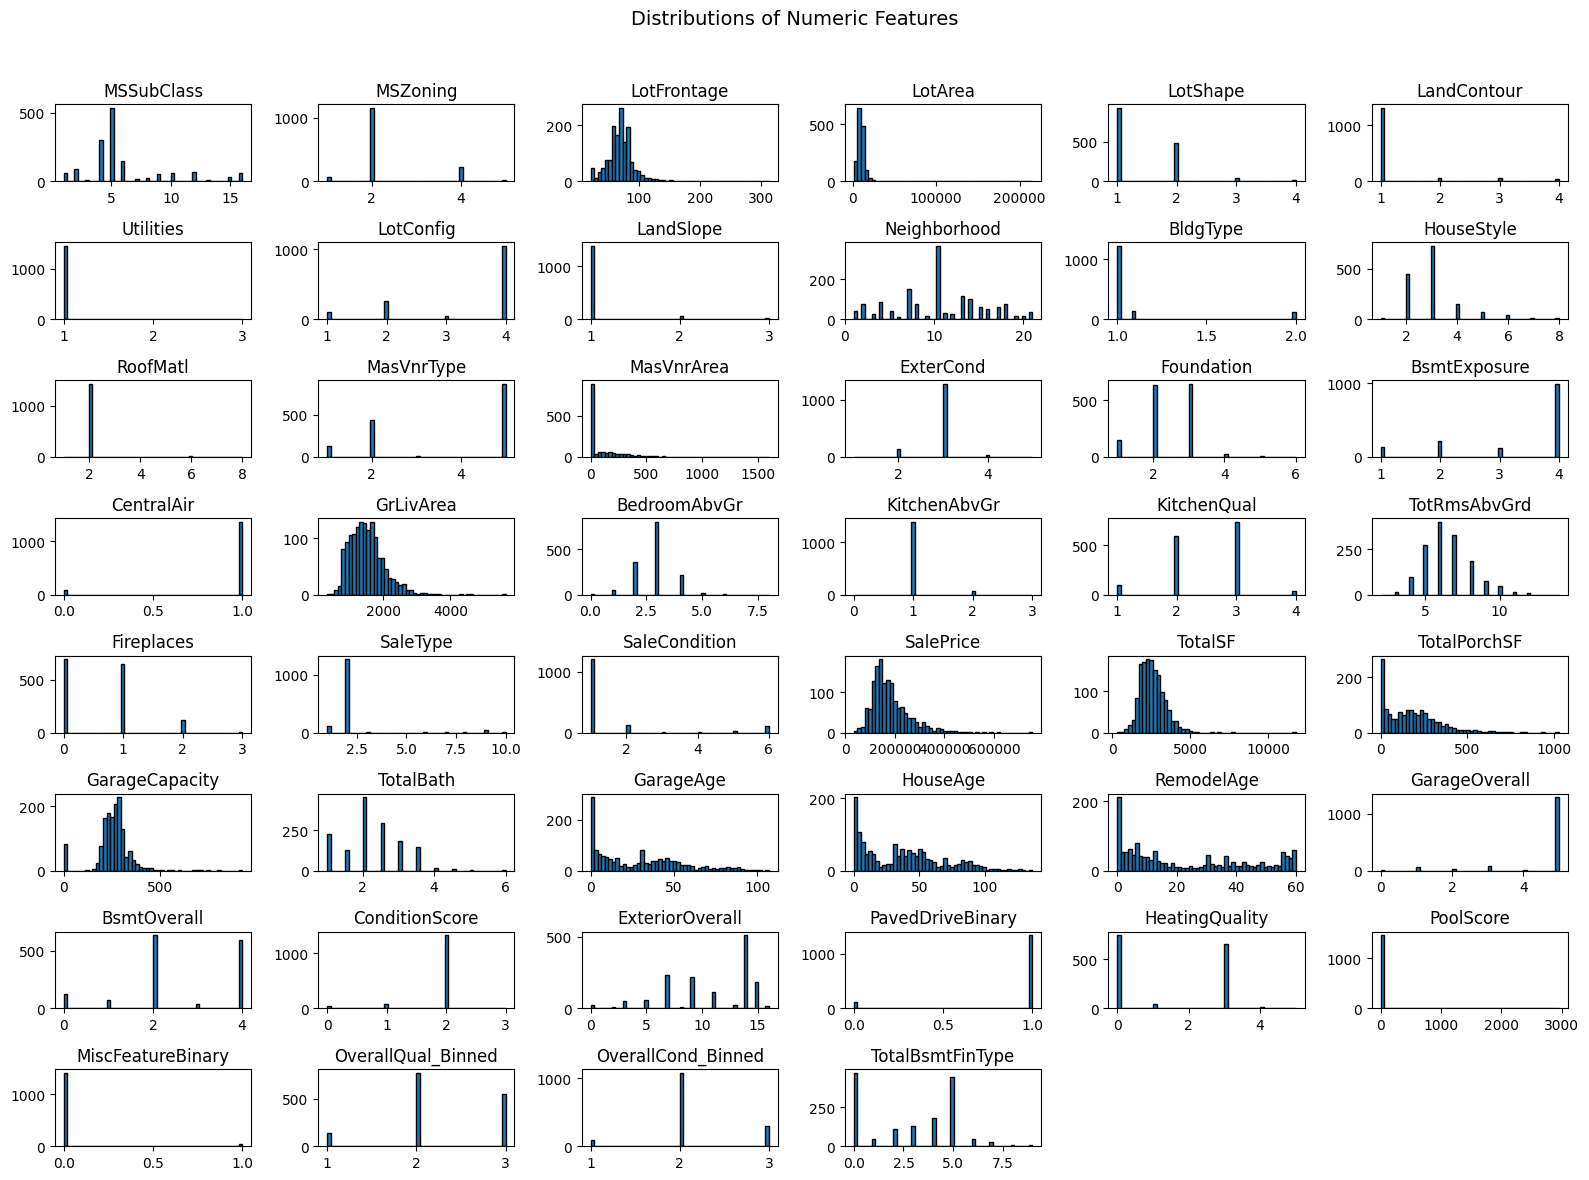

In [11]:
# Set font size for readability
plt.rc('font', size=10)  # Adjust font size as needed

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Define the number of columns in the grid layout (6 columns per row)
num_cols = 6
num_features = numeric_cols.shape[1]
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate required rows

# Plot histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols.columns):
    axes[i].hist(numeric_cols[col], bins=50, edgecolor="black")
    axes[i].set_title(col)

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Overall title
fig.suptitle("Distributions of Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

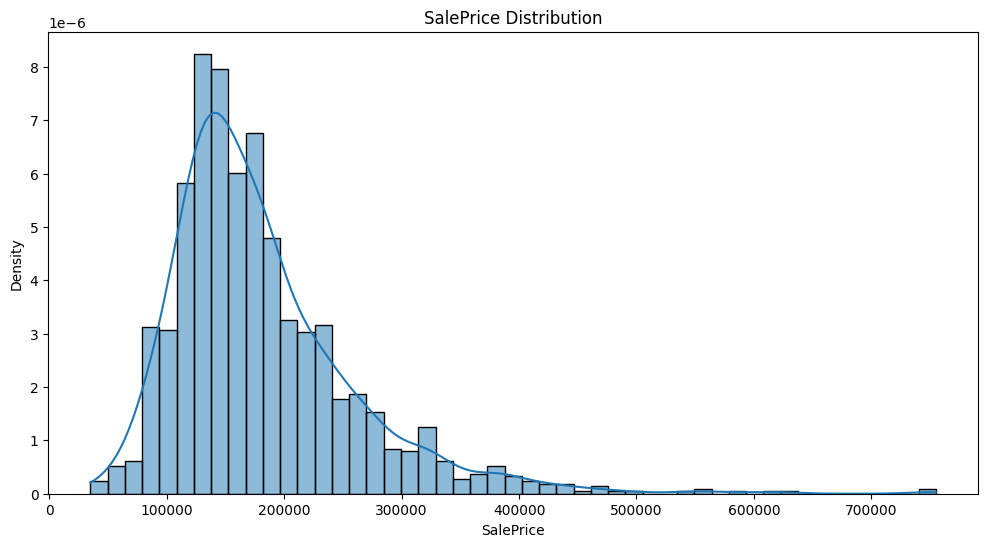

In [12]:
# Visualize distributions of SalePrice and numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, stat='density')
plt.title("SalePrice Distribution")
plt.show()

In [13]:
# Checking skewness and kurtosis
print("Skewness: {:.2f}".format(df['SalePrice'].skew()))
print("Kurtosis: {:.2f}".format(df['SalePrice'].kurt()))

Skewness: 1.88
Kurtosis: 6.54


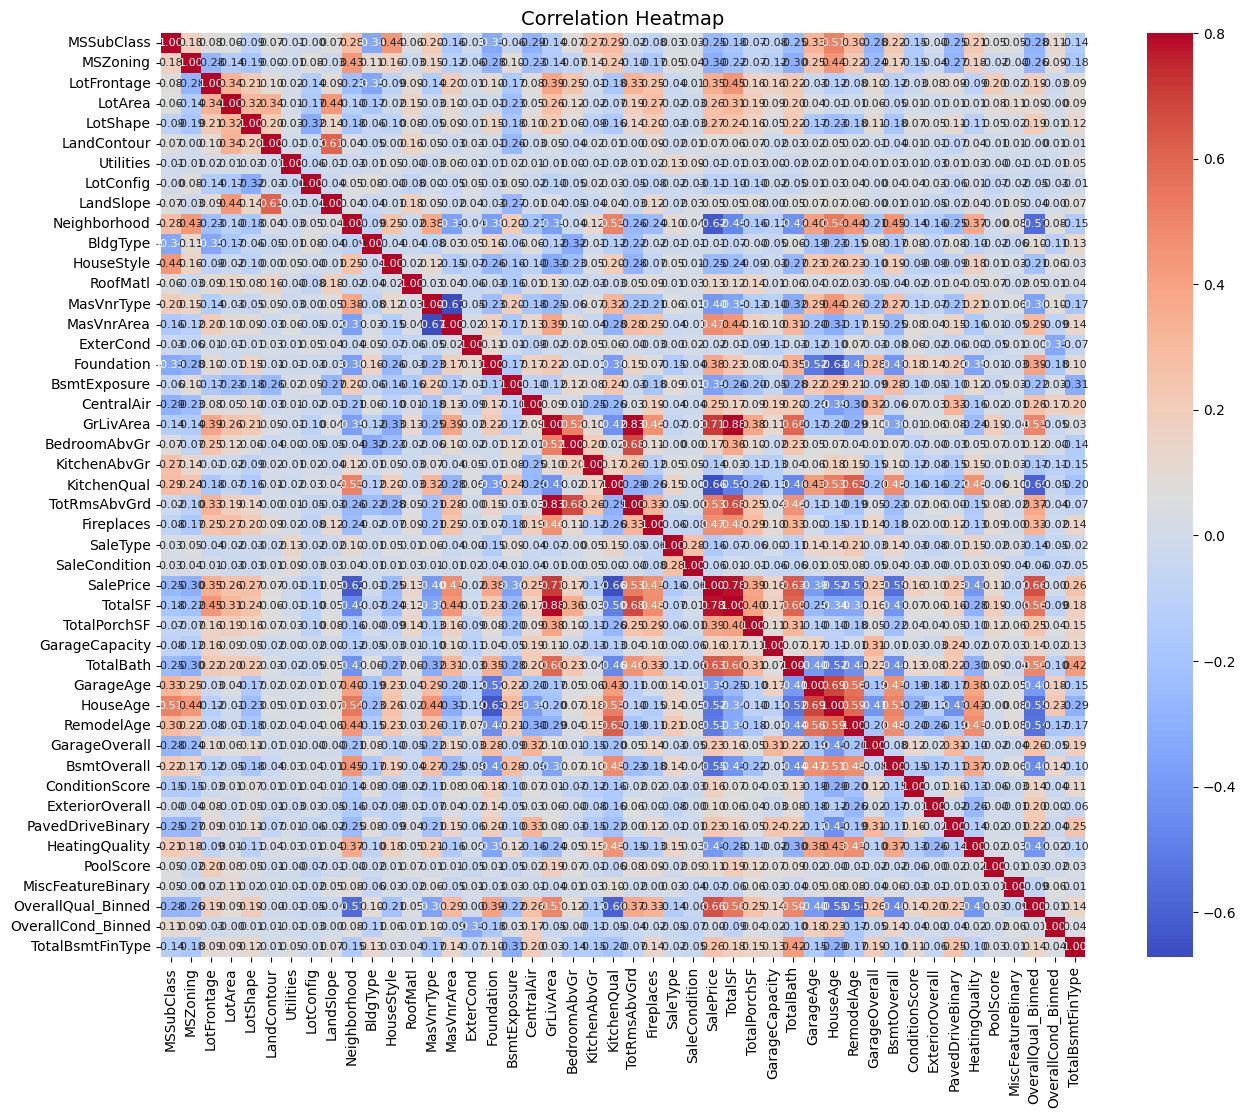

In [14]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation heatmap with adjusted figure size and annotation font size
plt.figure(figsize=(16, 12))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

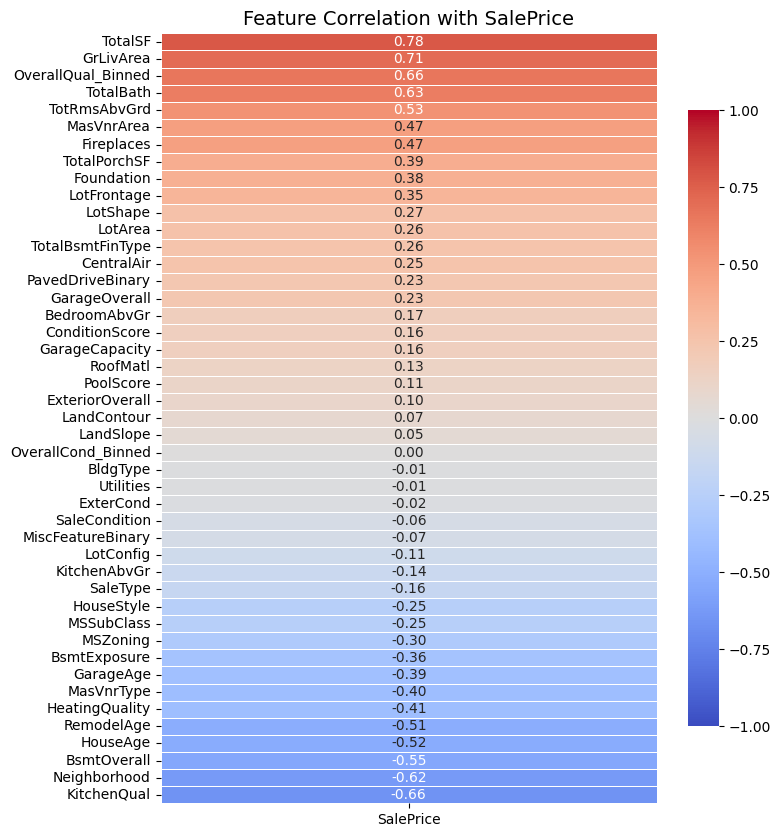

In [15]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64']).corr()

# Extract correlations with SalePrice, sort them, and drop SalePrice itself
saleprice_corr = corrmat['SalePrice'].sort_values(ascending=False).drop('SalePrice')

# Plot correlation heatmap for SalePrice only
plt.figure(figsize=(8, 10))
sns.heatmap(saleprice_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            annot_kws={"size": 10}, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title("Feature Correlation with SalePrice", fontsize=14)
plt.show()

In [16]:
# Create a pairplot for all features in the DataFrame
sns.pairplot(df, height=2.0)

# Add a title with some padding from the plot
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Modelling

In [17]:
# 'df' is the dataset and 'SalePrice' is the target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
def evaluate_model(model, X_train, y_train, X_test, y_test, param_space=None):
    # Train initial model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate initial metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r2 = r2_score(y_test, y_pred)

    # Cross-validation metrics
    cv_mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_mse_scores)
    cv_mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    initial_metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2,
        'CV MSE': -cv_mse_scores.mean(),
        'CV RMSE': cv_rmse_scores.mean(),
        'CV MAE': -cv_mae_scores.mean(),
        'CV R2': cv_r2_scores.mean()
    }

    optimized_model = None
    optimized_metrics = initial_metrics

    # Define the optimization approach if param_space is provided
    if param_space:
        optimizer = BayesSearchCV(model, search_spaces=param_space, n_iter=10, cv=5,
                                  scoring='neg_mean_squared_error', random_state=42)

        optimizer.fit(X_train, y_train)
        optimized_model = optimizer.best_estimator_
        y_pred_optimized = optimized_model.predict(X_test)

        # Calculate optimized metrics
        mse_opt = mean_squared_error(y_test, y_pred_optimized)
        rmse_opt = np.sqrt(mse_opt)
        mae_opt = mean_absolute_error(y_test, y_pred_optimized)
        mape_opt = mean_absolute_percentage_error(y_test, y_pred_optimized) * 100
        r2_opt = r2_score(y_test, y_pred_optimized)

        # Cross-validation metrics for optimized model
        cv_mse_scores_opt = cross_val_score(optimized_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse_scores_opt = np.sqrt(-cv_mse_scores_opt)
        cv_mae_scores_opt = cross_val_score(optimized_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        cv_r2_scores_opt = cross_val_score(optimized_model, X_train, y_train, cv=5, scoring='r2')

        optimized_metrics = {
            'MSE': mse_opt,
            'RMSE': rmse_opt,
            'MAE': mae_opt,
            'MAPE': mape_opt,
            'R2': r2_opt,
            'CV MSE': -cv_mse_scores_opt.mean(),
            'CV RMSE': cv_rmse_scores_opt.mean(),
            'CV MAE': -cv_mae_scores_opt.mean(),
            'CV R2': cv_r2_scores_opt.mean()
        }

    return initial_metrics, optimized_metrics, optimized_model

In [19]:
param_spaces = {
    'LinearRegression': {'fit_intercept': [True, False]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1.0]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

In [20]:
results = {}
optimized_models = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    param_space = param_spaces.get(model_name, None)
    initial_metrics, optimized_metrics, optimized_model = evaluate_model(
        model, X_train, y_train, X_test, y_test, param_space=param_space
    )
    results[model_name + ' Initial'] = initial_metrics
    results[model_name + ' Optimized'] = optimized_metrics
    if optimized_model:
        optimized_models[model_name] = optimized_model

Evaluating LinearRegression...
Evaluating RandomForest...
Evaluating AdaBoost...
Evaluating XGBoost...


In [21]:
# Display results in a DataFrame
metrics_df = pd.DataFrame(results)
metrics_df

,LinearRegression Initial,LinearRegression Optimized,RandomForest Initial,RandomForest Optimized,AdaBoost Initial,AdaBoost Optimized,XGBoost Initial,XGBoost Optimized
MSE,1.335224e+09,1.335224e+09,8.835413e+08,8.790601e+08,1.180081e+09,1.238830e+09,8.807470e+08,7.867161e+08
RMSE,3.654072e+04,3.654072e+04,2.972442e+04,2.964895e+04,3.435231e+04,3.519701e+04,2.967738e+04,2.804846e+04
MAE,2.415786e+04,2.415786e+04,1.764738e+04,1.756820e+04,2.304866e+04,2.370140e+04,1.827189e+04,1.684765e+04
MAPE,1.419415e+01,1.419415e+01,1.078014e+01,1.073398e+01,1.585412e+01,1.630375e+01,1.108232e+01,1.024358e+01
R2,8.259234e-01,8.259234e-01,8.848105e-01,8.853947e-01,8.461498e-01,8.384906e-01,8.851748e-01,8.974338e-01
CV MSE,1.462779e+09,1.462779e+09,8.398114e+08,8.374937e+08,1.077381e+09,1.049900e+09,9.116213e+08,7.974661e+08
CV RMSE,3.711834e+04,3.711834e+04,2.856768e+04,2.855333e+04,3.265014e+04,3.230351e+04,2.982634e+04,2.780105e+04
CV MAE,2.240536e+04,2.240536e+04,1.764105e+04,1.773371e+04,2.270673e+04,2.277896e+04,1.832139e+04,1.687226e+04
CV R2,7.642980e-01,7.642980e-01,8.601966e-01,8.607298e-01,8.185474e-01,8.214757e-01,8.492743e-01,8.690738e-01


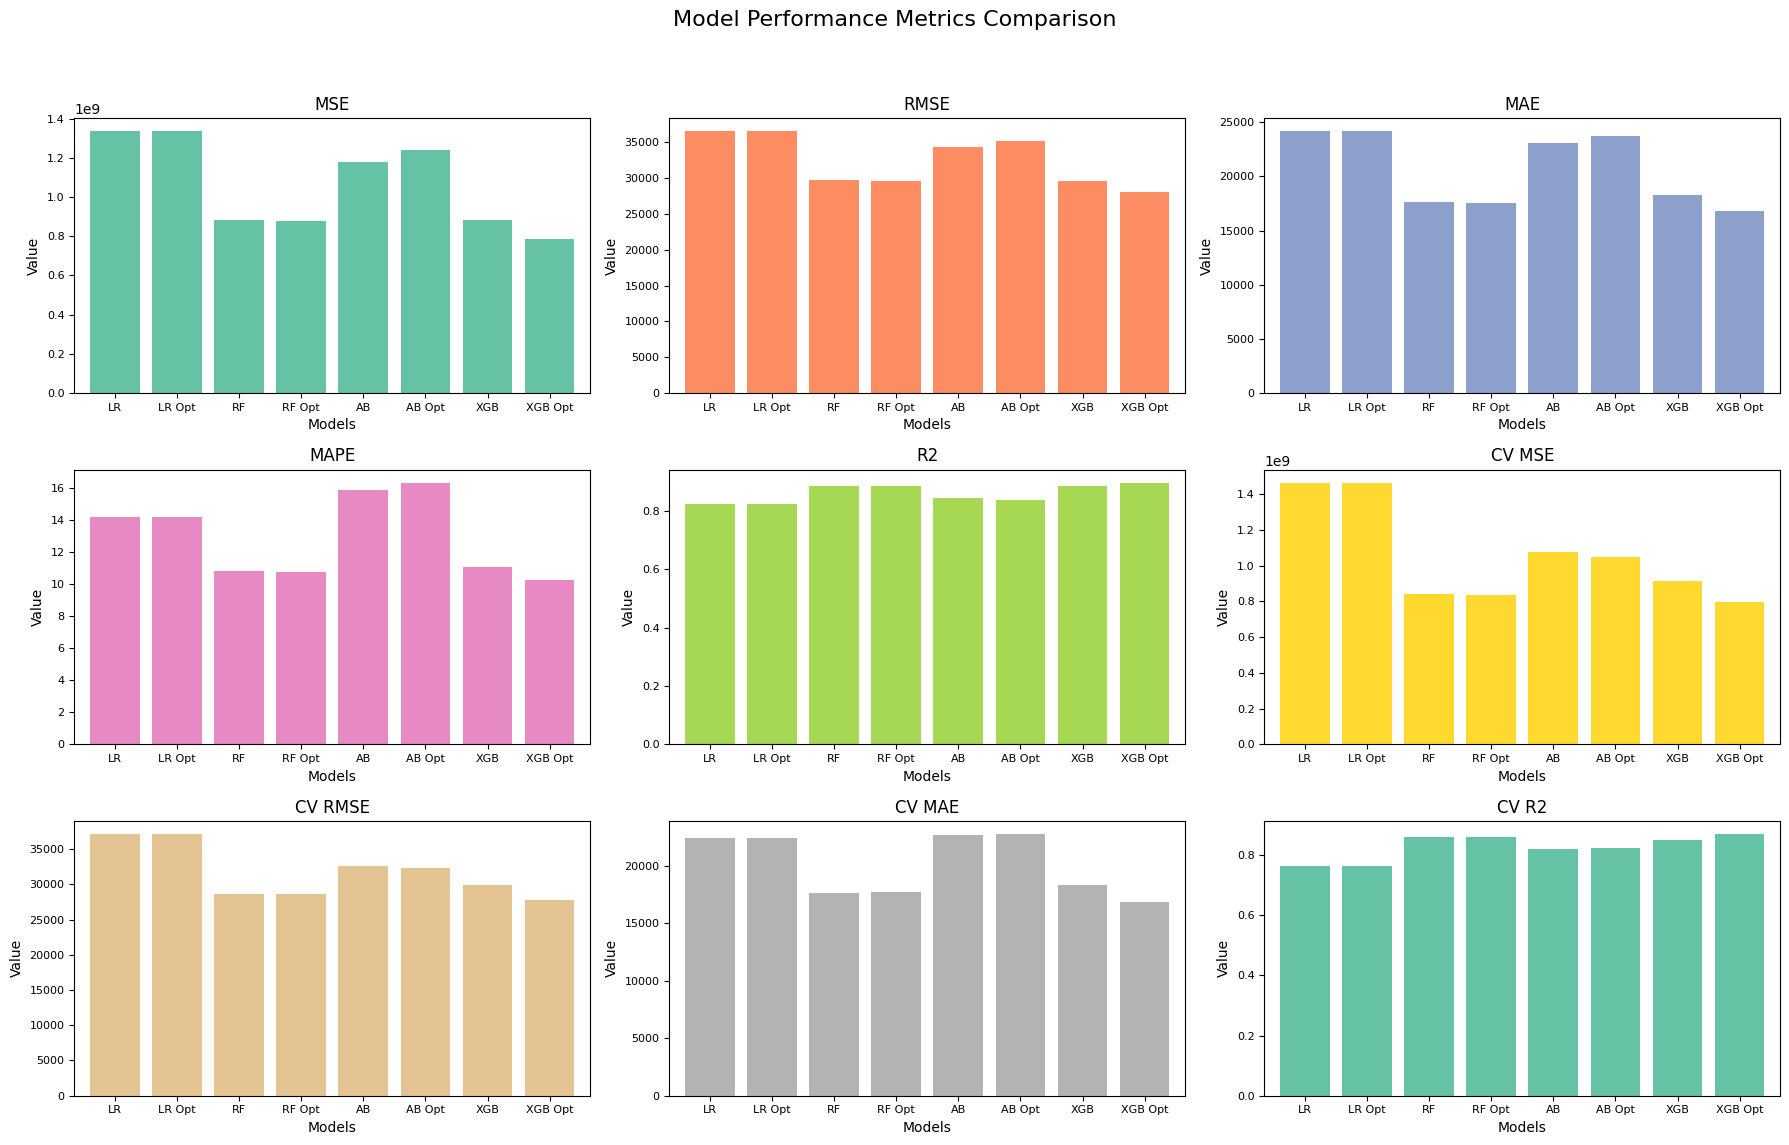

In [22]:
# Set a color palette for exactly 9 distinct colors (one for each metric)
colors = sns.color_palette("Set2", 9)

# Abbreviate model names and add 'Opt' for optimized versions
metrics_df_abbreviated = metrics_df.rename(columns={
    'LinearRegression Initial': 'LR',
    'LinearRegression Optimized': 'LR Opt',
    'RandomForest Initial': 'RF',
    'RandomForest Optimized': 'RF Opt',
    'AdaBoost Initial': 'AB',
    'AdaBoost Optimized': 'AB Opt',
    'XGBoost Initial': 'XGB',
    'XGBoost Optimized': 'XGB Opt'
}).T  # Transpose for plotting

# List of all metrics
metrics = metrics_df_abbreviated.columns

# Set up a grid of subplots (3 rows x 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()  # Flatten to easily iterate over each subplot

# Plot each metric in a separate subplot with different colors
for i, metric in enumerate(metrics):
    metrics_df_abbreviated[[metric]].plot(
        kind='bar',
        ax=axs[i],
        color=colors[i],
        legend=False,
        width=0.8
    )
    axs[i].set_title(metric, fontsize=12)
    axs[i].set_xlabel("Models", fontsize=10)
    axs[i].set_ylabel("Value", fontsize=10)
    axs[i].tick_params(axis='x', rotation=0, labelsize=8)
    axs[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots (in case we have fewer than 9 metrics)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and add a main title
plt.suptitle("Model Performance Metrics Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title
plt.show()


Feature Importance

In [23]:
def get_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        # For models with feature_importances_ attribute (Random Forest, AdaBoost, XGBoost)
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For Linear Regression, use coefficients (absolute values for importance)
        importance = np.abs(model.coef_)
    else:
        raise ValueError("The model does not support feature importance extraction.")

    # Create a DataFrame with feature names and their corresponding importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    return importance_df

In [30]:
# Dictionary to store feature importance data for each model
feature_importances = {}

# Assuming `feature_names` is a list of names of columns in X_train
feature_names = X_train.columns

# List to collect DataFrames for each model
importance_dfs = []

for model_name, model in optimized_models.items():
    try:
        # Get feature importance for the model
        importance_df = get_feature_importance(model, feature_names=feature_names)
        importance_df['Model'] = model_name  # Add a column for the model name
        importance_dfs.append(importance_df)  # Add to the list of DataFrames

        # Store in feature_importances dictionary for Step 3
        feature_importances[model_name] = importance_df
        # print(f"Feature importance extracted for {model_name}")

    except ValueError as e:
        print(f"{model_name} does not support feature importance extraction: {e}")

# Concatenate all DataFrames into a single DataFrame for overall view
all_importance_df = pd.concat(importance_dfs, ignore_index=True)
all_importance_df = all_importance_df[['Model', 'Feature', 'Importance']]
all_importance_df = all_importance_df.sort_values(by=['Model', 'Importance'], ascending=[True, False])

# Display all_importance_df to verify
all_importance_df


,Model,Feature,Importance
90,AdaBoost,TotalSF,0.338373
91,AdaBoost,Neighborhood,0.245718
92,AdaBoost,GrLivArea,0.042605
93,AdaBoost,TotRmsAbvGrd,0.039784
94,AdaBoost,KitchenQual,0.039453
...,...,...,...
175,XGBoost,Utilities,0.000290
176,XGBoost,LandSlope,0.000000
177,XGBoost,ExterCond,0.000000
178,XGBoost,Foundation,0.000000


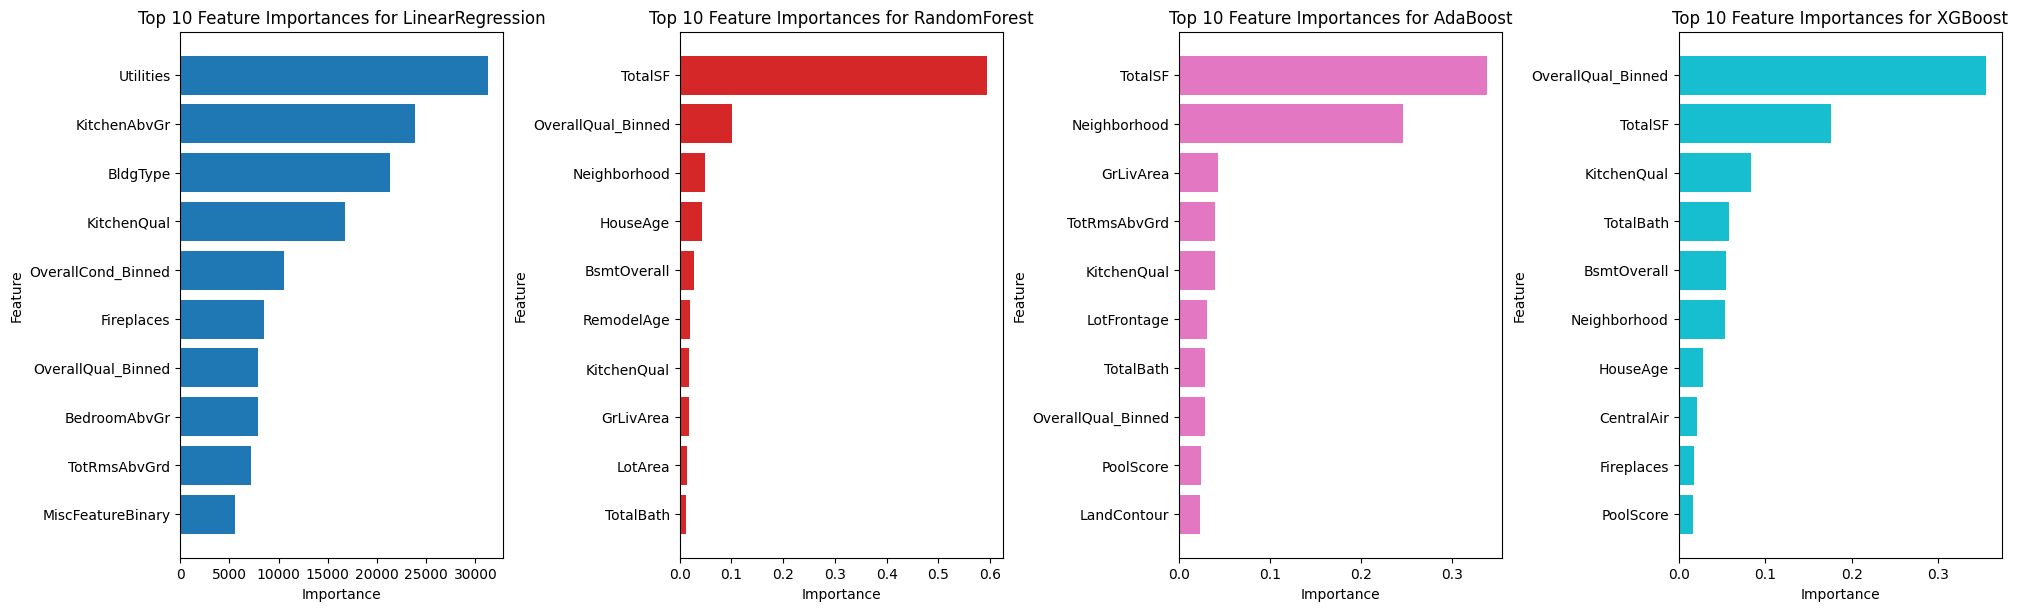

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Ensure that feature_importances is populated correctly
num_models = len(feature_importances)
if num_models > 0:
    # Set up a color map and figure size
    cmap = cm.get_cmap('tab10', num_models)  # Different colors for each subplot
    fig, axs = plt.subplots(1, num_models, figsize=(5 * num_models, 6), constrained_layout=True)

    # If there's only one model, make axs a list for consistent indexing
    if num_models == 1:
        axs = [axs]

    # Loop through each model and plot its feature importances
    for i, (model_name, importance_df) in enumerate(feature_importances.items()):
        # Select the top 10 features
        top_features = importance_df.head(10)

        # Plot feature importances in the corresponding subplot
        axs[i].barh(top_features['Feature'], top_features['Importance'], color=cmap(i))
        axs[i].invert_yaxis()  # Highest importance at the top
        axs[i].set_title(f'Top 10 Feature Importances for {model_name}')
        axs[i].set_xlabel('Importance')
        axs[i].set_ylabel('Feature')

    # Display the plot
    plt.show()
else:
    print("No feature importances available for plotting.")


Prediction

Test RMSE for Tuned XGBoost: 28048.4604


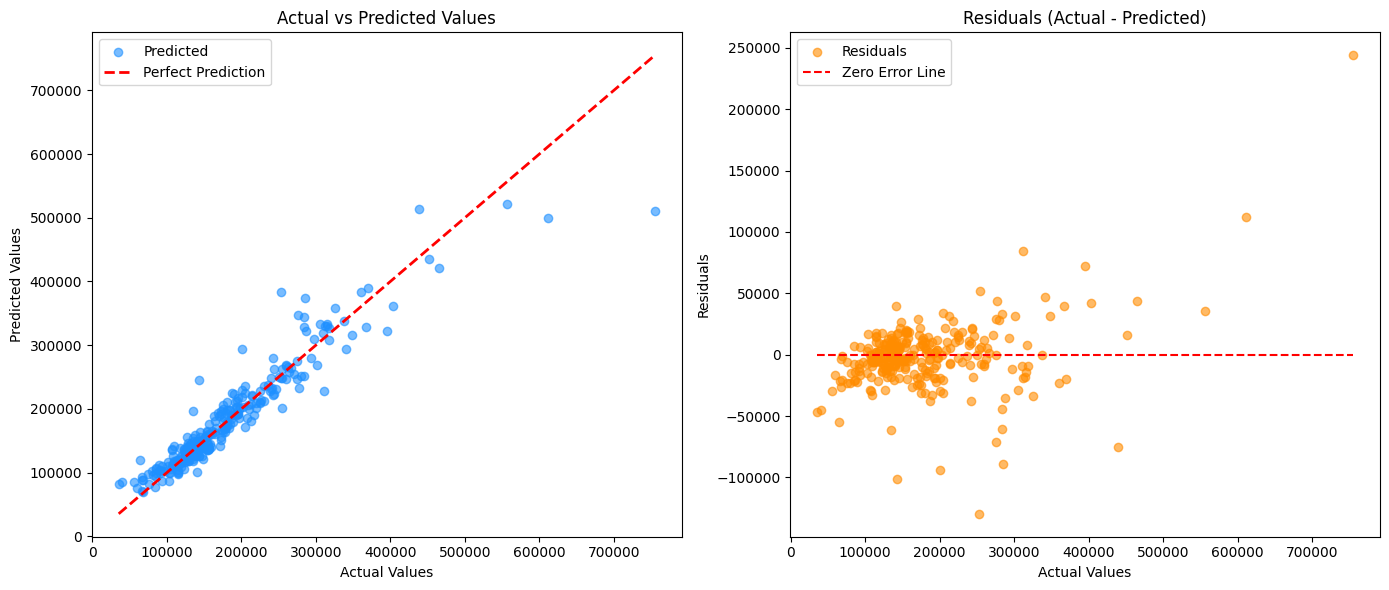

In [32]:
# Step 1: Train the tuned XGBoost model on the entire training set (if not done previously)
optimized_xgb = optimized_models.get('XGBoost')  # Retrieve the optimized model from dictionary
optimized_xgb.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred = optimized_xgb.predict(X_test)

# Step 3: Calculate the RMSE for predictions to compare to previous metric
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE for Tuned XGBoost: {rmse_test:.4f}")

# Step 4: Plot Actual vs Predicted and Residuals in subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Actual vs Predicted
axs[0].scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', label='Predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted Values')
axs[0].legend()

# Plot Residuals (Differences)
residuals = y_test - y_pred
axs[1].scatter(y_test, residuals, alpha=0.6, color='darkorange', label='Residuals')
axs[1].hlines(0, y_test.min(), y_test.max(), colors='red', linestyles='dashed', label='Zero Error Line')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals (Actual - Predicted)')
axs[1].legend()

plt.tight_layout()
plt.show()